# Влияние $\epsilon$

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

sys.path.append('/home/tpopova/prj/PB_SCF/08_2D_pore/py_files')
sys.path.append('/home/tpopova/prj/PB_SCF/01_dendrone_pore/py_files')

import config_loader
from out_reader import out_reader, get_profiles_by_y_or_x
from dendrons_pore import dendrons_pore

INFO:root:Конфигурация успешно загружена из /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml


Параметры

In [2]:
N = 25
S = 50
D = 25
valence = -0.5

# Для 2D
L_pore = 50
space = 15
L_wall = 20

Cs = 0.001
chi_solv = 0.5
chi_surf = 0

eps_membrane = [5, 40, 80]

In [3]:
N, n, theta, H_dendrons, r_in_dendrons, r_out_dendrons, psi_in_dendrons, psi_out_dendrons, c_pol_dendrons, _ = dendrons_pore(
    Cs = Cs,
    
    #параметры щетки
    alpha = abs(valence),
    S = S,
    
    #параметры поры
    D = D,
    N_opt = N,
    
)

print(N, H_dendrons)

25 [10.96641781]


In [4]:
df_dict = {}

# Цикл по каждому значению epsilon_surf
for eps in eps_membrane:
    # Загрузка конфигурации
    config = config_loader.load_config()

    # Обновление параметров конфигурации для текущего epsilon_surf
    params_to_update = {
        "Cs": Cs,
        "D": D,
        "L_pore": L_pore,
        "L_wall": L_wall,
        "N": N,
        "S": S,
        "chi_solv": chi_solv,
        "chi_surf": chi_surf,
        "max_val": 0.1,
        "min_val": 0.1,
        "output_dir": f"2D_pore_in_files_eps",  # Уникальная папка для каждого epsilon
        "range_param": 'Cs',
        "space": space,
        "target_dir": "/home/tpopova/prj/PB_SCF/08_2D_pore/scf_templates",
        "valence": valence,
        "epsilon_surf": eps  # Устанавливаем текущее значение epsilon
    }

    # Обновляем конфигурацию
    for param, value in params_to_update.items():
        config = config_loader.update_config_param(config, param, value)

    # Сохраняем обновленную конфигурацию
    config_loader.save_config(config)

    # Получение данных
    df, x, y, psi, phi_brush, phi_end_brush = out_reader()

    # Сохраняем df в словарь по значению epsilon_surf
    df_dict[eps] = df

INFO:root:Конфигурация успешно загружена из /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml
INFO:root:Обновление параметра Cs на 0.001
INFO:root:Обновление параметра D на 25
INFO:root:Обновление параметра L_pore на 50
INFO:root:Обновление параметра L_wall на 20
INFO:root:Обновление параметра N на 25
INFO:root:Обновление параметра S на 50
INFO:root:Обновление параметра chi_solv на 0.5
INFO:root:Обновление параметра chi_surf на 0
INFO:root:Обновление параметра max_val на 0.1
INFO:root:Обновление параметра min_val на 0.1
INFO:root:Обновление параметра output_dir на 2D_pore_in_files_eps
INFO:root:Обновление параметра range_param на Cs
INFO:root:Обновление параметра space на 15
INFO:root:Обновление параметра target_dir на /home/tpopova/prj/PB_SCF/08_2D_pore/scf_templates
INFO:root:Обновление параметра valence на -0.5
INFO:root:Обновление параметра epsilon_surf на 5
INFO:root:Конфигурация успешно сохранена в /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml
INFO:root:Конфигур

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
DIIS has been notified
Your guess = 2.964552e+00 
iterations = 1 g = 2.693554e+00 
iterations = 2 g = 2.462562e+00 
iterations = 3 g = 1.630411e+00 
iterations = 4 g = 1.723832e+00 
iterations = 5 g = 1.616643e+00 
iterations = 6 g = 1.519245e+00 
iterations = 7 g = 1.519451e+00 
iterations = 8 g = 1.423439e+00 
iterations = 9 g = 1.403946e+00 
iterations = 10 g = 1.290314e+00 
iterations = 11 g = 1.230843e+00 
iterations = 12 g = 1.135767e+00 
iterations = 13 g = 1.138642e+00 
iterations = 14 g = 1.099165e+00 
iterations = 15 g = 1.082587e+00 
iterations = 16 g = 1.113058e+00 
iterations = 17 g = 1.048273e+00 
iterations = 18 g = 1.032639e+00 
iterations = 19 g = 1.019421e+00 
iterations = 20 g = 1.006027e+00 
iterations = 21 g = 9.690533e-01 
iterations = 22 g = 9.

INFO:root:Конфигурация успешно загружена из /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml
INFO:root:Обновление параметра Cs на 0.001
INFO:root:Обновление параметра D на 25
INFO:root:Обновление параметра L_pore на 50
INFO:root:Обновление параметра L_wall на 20
INFO:root:Обновление параметра N на 25
INFO:root:Обновление параметра S на 50
INFO:root:Обновление параметра chi_solv на 0.5
INFO:root:Обновление параметра chi_surf на 0
INFO:root:Обновление параметра max_val на 0.1
INFO:root:Обновление параметра min_val на 0.1
INFO:root:Обновление параметра output_dir на 2D_pore_in_files_eps
INFO:root:Обновление параметра range_param на Cs
INFO:root:Обновление параметра space на 15
INFO:root:Обновление параметра target_dir на /home/tpopova/prj/PB_SCF/08_2D_pore/scf_templates
INFO:root:Обновление параметра valence на -0.5
INFO:root:Обновление параметра epsilon_surf на 40
INFO:root:Конфигурация успешно сохранена в /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml
INFO:root:Конфигу

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
DIIS has been notified
Your guess = 2.954776e+00 
iterations = 1 g = 2.681645e+00 
iterations = 2 g = 2.447456e+00 
iterations = 3 g = 1.559161e+00 
iterations = 4 g = 1.624566e+00 
iterations = 5 g = 1.441422e+00 
iterations = 6 g = 1.276800e+00 
iterations = 7 g = 1.275251e+00 
iterations = 8 g = 1.209271e+00 
iterations = 9 g = 1.188186e+00 
iterations = 10 g = 1.120868e+00 
iterations = 11 g = 1.104798e+00 
iterations = 12 g = 1.000582e+00 
iterations = 13 g = 1.000121e+00 
iterations = 14 g = 1.008507e+00 
iterations = 15 g = 1.011781e+00 
iterations = 16 g = 9.402055e-01 
iterations = 17 g = 9.393359e-01 
iterations = 18 g = 8.992053e-01 
iterations = 19 g = 8.987831e-01 
iterations = 20 g = 8.762848e-01 
iterations = 21 g = 8.761022e-01 
iterations = 22 g = 8.

INFO:root:Конфигурация успешно загружена из /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml
INFO:root:Обновление параметра Cs на 0.001
INFO:root:Обновление параметра D на 25
INFO:root:Обновление параметра L_pore на 50
INFO:root:Обновление параметра L_wall на 20
INFO:root:Обновление параметра N на 25
INFO:root:Обновление параметра S на 50
INFO:root:Обновление параметра chi_solv на 0.5
INFO:root:Обновление параметра chi_surf на 0
INFO:root:Обновление параметра max_val на 0.1
INFO:root:Обновление параметра min_val на 0.1
INFO:root:Обновление параметра output_dir на 2D_pore_in_files_eps
INFO:root:Обновление параметра range_param на Cs
INFO:root:Обновление параметра space на 15
INFO:root:Обновление параметра target_dir на /home/tpopova/prj/PB_SCF/08_2D_pore/scf_templates
INFO:root:Обновление параметра valence на -0.5
INFO:root:Обновление параметра epsilon_surf на 80
INFO:root:Конфигурация успешно сохранена в /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml
INFO:root:Конфигу

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
DIIS has been notified
Your guess = 2.945516e+00 
iterations = 1 g = 2.670751e+00 
iterations = 2 g = 2.434679e+00 
iterations = 3 g = 1.525067e+00 
iterations = 4 g = 1.580294e+00 
iterations = 5 g = 1.369074e+00 
iterations = 6 g = 1.191272e+00 
iterations = 7 g = 1.185916e+00 
iterations = 8 g = 1.093115e+00 
iterations = 9 g = 1.066440e+00 
iterations = 10 g = 1.067039e+00 
iterations = 11 g = 1.051146e+00 
iterations = 12 g = 9.213259e-01 
iterations = 13 g = 9.289524e-01 
iterations = 14 g = 9.761189e-01 
iterations = 15 g = 9.727406e-01 
iterations = 16 g = 8.566079e-01 
iterations = 17 g = 8.300703e-01 
iterations = 18 g = 7.954567e-01 
iterations = 19 g = 7.835731e-01 
iterations = 20 g = 7.681960e-01 
iterations = 21 g = 7.404641e-01 
iterations = 22 g = 8.

# График потенциала

<>:25: SyntaxWarning: invalid escape sequence '\ '
<>:25: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipykernel_34262/2720550306.py:25: SyntaxWarning: invalid escape sequence '\ '
  plt.title("$Профили \ \\psi \ vs \ x \ для \ различных \ \\epsilon_{surf}$")


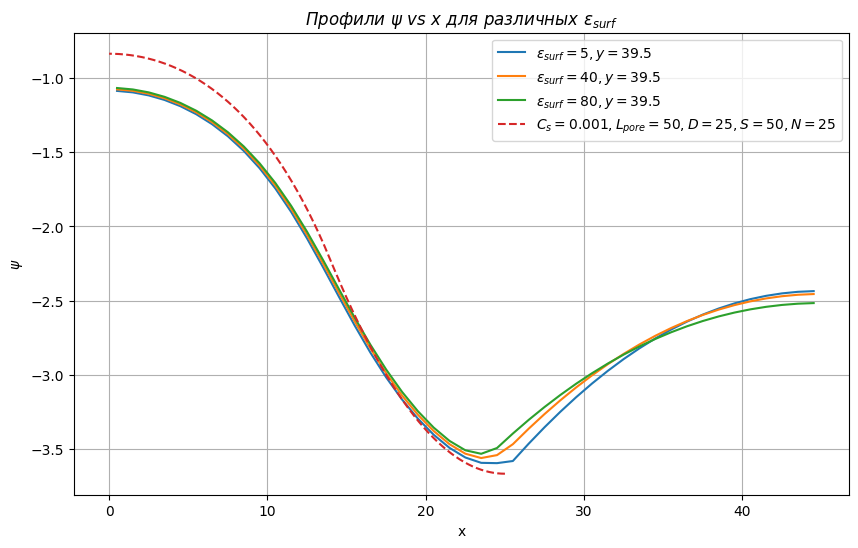

In [5]:
#  Доли от центра для y (например, центральная ось)
y_fraction = [0]  # 0 означает долю 0% от начала (центральная линия)

# Создаем график
plt.figure(figsize=(10, 6))

# Цикл по каждому значению epsilon_surf
for eps, psi_data in df_dict.items():

    # Получение профилей для выбранных y
    psi_nam = get_profiles_by_y_or_x(
        psi_data, y_fraction, profiles_name='sys_noname_psi', groupby='y', coord='x', use_fraction=True
    )

    # Построение графиков для psi
    for y_val, data in psi_nam.items():
        plt.plot(
            data['x'], data['sys_noname_psi'],
            label=f"$\\epsilon_{{surf}} = {eps}, y = {y_val}$"
        )
plt.plot(np.hstack((r_in_dendrons, r_out_dendrons)), np.hstack((psi_in_dendrons, psi_out_dendrons)), linestyle = '--', label = f'$C_s = {Cs}, L_{{pore}} = {L_pore}, D = {D}, S = {S}, N = {N}$')
# Настройки графика
plt.xlabel("x")
plt.ylabel("$\\psi$")
plt.title("$Профили \ \\psi \ vs \ x \ для \ различных \ \\epsilon_{surf}$")
plt.legend()
plt.grid(True)
plt.show()

# График плотности полимера

<>:25: SyntaxWarning: invalid escape sequence '\ '
<>:25: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipykernel_34262/4025849764.py:25: SyntaxWarning: invalid escape sequence '\ '
  plt.title("$Профили \ \\phi \ vs \ x \ для \ различных \ \\epsilon_{surf}$")


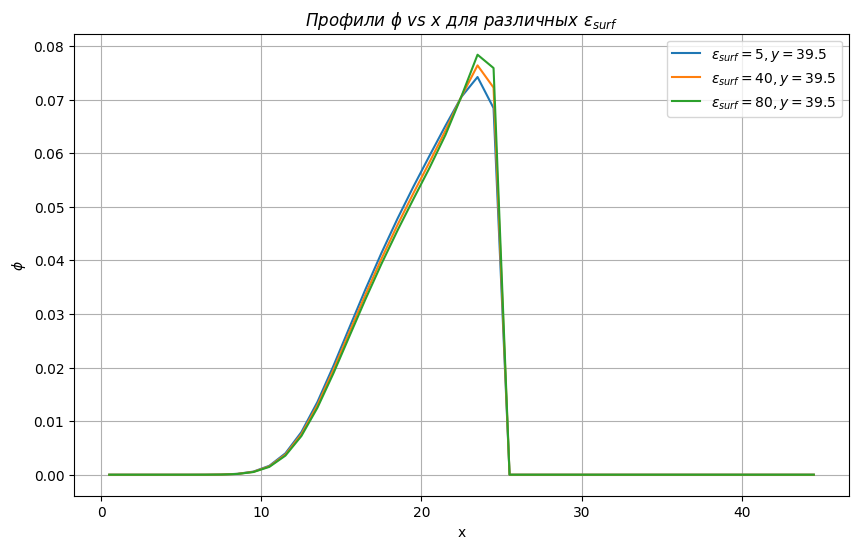

In [6]:
#  Доли от центра для y (например, центральная ось)
y_fraction = [0]  # 0 означает долю 0% от начала (центральная линия)

# Создаем график
plt.figure(figsize=(10, 6))

# Цикл по каждому значению epsilon_surf
for eps, phi_data in df_dict.items():

    # Получение профилей для выбранных y
    phi_nam = get_profiles_by_y_or_x(
        phi_data, y_fraction, profiles_name='combined_phi', groupby='y', coord='x', use_fraction=True
    )

    # Построение графиков для psi
    for y_val, data in phi_nam.items():
        plt.plot(
            data['x'], data['combined_phi'],
            label=f"$\\epsilon_{{surf}} = {eps}, y = {y_val}$"
        )
# plt.plot(r_in_dendrons, c_pol_dendrons, linestyle = '--', label = f'$C_s = {Cs}, L_{{pore}} = {L_pore}, D = {D}, S = {S}, N = {N}$')
# Настройки графика
plt.xlabel("x")
plt.ylabel("$\\phi$")
plt.title("$Профили \ \\phi \ vs \ x \ для \ различных \ \\epsilon_{surf}$")
plt.legend()
plt.grid(True)
plt.show()